# This is example of Vector Space

In [6]:
import numpy as np

example_vector = np.array([1,2,3])
print(f"{example_vector}")
print(f"Axis {example_vector.ndim}")
print(f"Shape: {example_vector.shape}")
print(f"Size: {example_vector.size}")

[1 2 3]
Axis 1
Shape: (3,)
Size: 3


## Difference Between Dimension in Mathematics and NumPy

In NumPy, the function `ndim` returns the number of axes (also called tensor rank) of an array.

Example:

```python
import numpy as np

v = np.array([1, 2, 3])
print(v.ndim)
````

Output:

```
1
```

This means the array has **one axis**.

However, in mathematics (Linear Algebra), the word "dimension" means something different.

The vector

$$
v = (1,2,3)
$$

is an element of

$$
\mathbb{R}^3
$$

The dimension of the vector space $\mathbb{R}^3$ is:

$$
3
$$

because it has 3 basis vectors.

---

### Key Difference

| Concept                | NumPy          | Mathematics              |
| ---------------------- | -------------- | ------------------------ |
| Meaning of "dimension" | Number of axes | Number of basis vectors  |
| For `[1,2,3]`          | `ndim = 1`     | Space dimension = 3      |
| Shape                  | `(3,)`         | Vector in $\mathbb{R}^3$ |

---

### Important Insight

NumPy dimension describes the **structure of the data container**.

Mathematical dimension describes the **dimension of the vector space**.

These are not the same concept.

# 📍 Example Problem: Coordinates and Distance

---

<div style="
background-color:#f4f8ff;
border-left:6px solid #4a6fa5;
padding:12px;
border-radius:6px;
">

<b>What is a Coordinate?</b><br><br>

A coordinate system allows us to describe the position of a point in space using numbers. In two-dimensional space ($\mathbb{R}^2$), a point is written as:

$$
(x, y)
$$

where $x$ represents the **horizontal position** and $y$ represents the **vertical position**.

**Example:** The geographic coordinate system used on Earth is a real-world example of coordinates. Every location on Earth is described by two numbers:
- **Latitude** — the north–south position (e.g., 51.5° N)
- **Longitude** — the east–west position (e.g., 0.0°, the Greenwich meridian)

So the location of Greenwich, London is $(0°, 51.5°)$ — a coordinate pair, just like $(x, y)$.

</div>

---

<div style="
background-color:#fffaf0;
border-left:6px solid #c9a227;
padding:12px;
border-radius:6px;
">

<b>Problem.</b><br><br>

Suppose:

- Patiphan's house is located at  
  $$
  (x_1, y_1)
  $$

- Worrawat's house is located at  
  $$
  (x_2, y_2)
  $$

Find the distance between the two houses.

</div>

---

<div style="
background-color:#f1f8f4;
border-left:6px solid #4f8a5b;
padding:12px;
border-radius:6px;
">

<b>Solution.</b><br><br>

We interpret each location as a vector in $\mathbb{R}^2$:

$$
\mathbf{p} = (x_1, y_1)
$$

$$
\mathbf{q} = (x_2, y_2)
$$

The vector pointing from Patiphan's house to Worrawat's house is:

$$
\mathbf{q} - \mathbf{p}
=
(x_2 - x_1,\; y_2 - y_1)
$$

The distance is the norm (length) of this vector:

$$
\color{#4a6fa5}{
d =
\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
}
$$

</div>

---

<div style="
background-color:#f8f5ff;
border-left:6px solid #7b6fc2;
padding:12px;
border-radius:6px;
">

<b>Interpretation.</b><br><br>

The distance formula comes from the Euclidean norm in $\mathbb{R}^2$:

$$
\| (a, b) \|
=
\sqrt{a^2 + b^2}
$$

So geometry is naturally expressed using vectors.

</div>

In [3]:
import math

patiphan_house = (2,3)
worrawat_house = (7,9)

def euclidean_distance_basic(p, q):
    total = 0
    for i in range(len(p)):
        total += (q[i] - p[i])**2
    return math.sqrt(total)

print(f"Different between house is {euclidean_distance_basic(patiphan_house, worrawat_house)}")

Different between house is 7.810249675906654


In [6]:
import numpy as np
import matplotlib.pyplot as plt

patiphan_house = np.array([2, 3])
worrawat_house = np.array([7, 9])

def euclidean_distance_numpy(p, q):
    v = q - p
    return np.sqrt(np.sum(v**2))
    
dist = euclidean_distance_numpy(patiphan_house, worrawat_house)
print(f"Distance between houses (NumPy): {dist:.4f}")

Distance between houses (NumPy): 7.8102


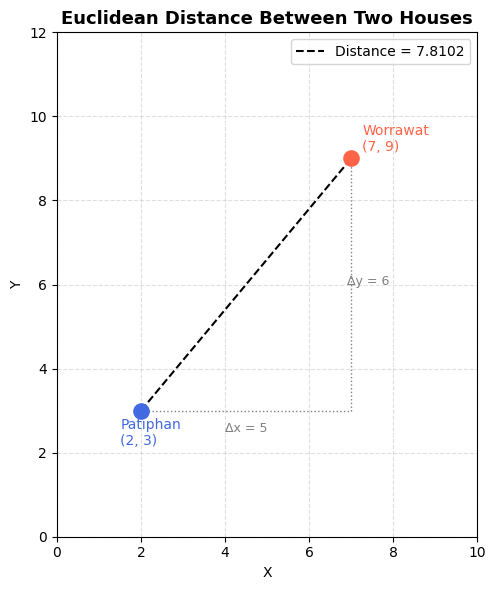

In [8]:
# --- Visualization ---
fig, ax = plt.subplots(figsize=(7, 6))

ax.scatter(*patiphan_house, color='royalblue', s=120, zorder=5)
ax.scatter(*worrawat_house, color='tomato',    s=120, zorder=5)

ax.annotate("Patiphan\n(2, 3)", patiphan_house,
            textcoords="offset points", xytext=(-15, -25), fontsize=10, color='royalblue')
ax.annotate("Worrawat\n(7, 9)", worrawat_house,
            textcoords="offset points", xytext=(8, 5),    fontsize=10, color='tomato')

ax.plot(*zip(patiphan_house, worrawat_house), 'k--', linewidth=1.5, label=f'Distance = {dist:.4f}')

ax.plot([patiphan_house[0], worrawat_house[0]], [patiphan_house[1], patiphan_house[1]],
        color='gray', linestyle=':', linewidth=1)
ax.plot([worrawat_house[0], worrawat_house[0]], [patiphan_house[1], worrawat_house[1]],
        color='gray', linestyle=':', linewidth=1)

ax.text(4.5, 2.5, f'Δx = {worrawat_house[0]-patiphan_house[0]}', ha='center', fontsize=9, color='gray')
ax.text(7.4, 6.0, f'Δy = {worrawat_house[1]-patiphan_house[1]}', ha='center', fontsize=9, color='gray')

ax.set_xlim(0, 10); ax.set_ylim(0, 12)
ax.set_xlabel('X'); ax.set_ylabel('Y')
ax.set_title('Euclidean Distance Between Two Houses', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()